In [1]:
import pandas as pd
import CococoNet_reader 
import pickle 
import tqdm
import Name_resolver
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
Name_resolver.species_name_resolver('Oryza sativa japonica')

'rice_jp'

In [3]:
species_with_nets = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')
species_with_nets = species_with_nets[:18]
# # species_with_nets = species_with_nets.drop(index = [13,14])
# # species_with_nets.loc[0,'Taxa ID'] = 39947 
taxa_to_keep = species_with_nets['Taxa ID'].to_list()
taxa_to_keep

[4530,
 39947,
 3750,
 4558,
 4577,
 29760,
 3711,
 3847,
 3880,
 4097,
 4113,
 4081,
 3702,
 3818,
 4565,
 3659,
 1753,
 15368]

In [4]:
species_with_nets_to_run = species_with_nets.loc[~species_with_nets['Common Name'].isin(['rice','wheat','rapeseed'])]
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [5]:
species_with_nets_to_run.to_csv('/data/passala/Generated_Tables/Reference_tables/species_for_running_cross_ortho_analysis.csv',index = False)

In [6]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv')
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [7]:
egad_scores = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/egad_scores_orthogroups.csv',index_col= 0)

In [8]:
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,0.500000,0.500000,0.79142,0.082094,0.75488,0.002001,...,0.500000,0.500000,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [10]:
def get_fc_table(species_1,species_2):
    """Takes two species common names in any order and returns the N to M table for that pair with species_1 as column 1 and species_2 as column 2 

    Args:
        species_1 (str): species common name
        species_2 (str): species common name

    Returns:
        str: All N-M gene pairs
    """
    import pandas as pd
    import os 

    list_of_files = os.listdir('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/1_1_ortho_FC_tables')
    trimmed_to_species_1 = list(filter(lambda x:species_1 in x, list_of_files))
    final_file = list(filter(lambda x: species_2 in x, trimmed_to_species_1))[0]
    formatted_final_file = f"/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/1_1_ortho_FC_tables/{final_file}"
    read_in_file = pd.read_csv(formatted_final_file, index_col= 0)

    return read_in_file

In [11]:
current_table = get_fc_table('rice_jp','soybean')

In [12]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,889388at3193,0.925159,0.821787,0.873473
1,36269at3193,0.492165,0.701251,0.596708
2,889692at3193,0.882713,0.844407,0.863560
3,33678at3193,0.627142,0.703343,0.665243
4,58131at3193,0.700754,0.830185,0.765469
...,...,...,...,...
6834,136779at3193,0.745907,0.868549,0.807228
6835,75844at3193,0.894477,0.729768,0.812122
6836,889843at3193,0.946770,0.958958,0.952864
6837,885679at3193,0.696159,0.621421,0.658790


In [16]:
current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == 'grape']['Taxa ID'].item()

In [17]:
current_og_groups = og_groups.loc[og_groups['Species']==current_species_taxa]
current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]

In [18]:
current_og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
6,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588
7,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702
78,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127
123,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467
213,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135
...,...,...,...,...,...,...
502784,9919at3193,29760_0:002a0e,29760,3193,29760_0:002a0e,LOC100241131
502814,9942at3193,29760_0:000cf8,29760,3193,29760_0:000cf8,LOC100241864
502815,9942at3193,29760_0:00180e,29760,3193,29760_0:00180e,LOC100261021
502816,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403


In [19]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,889388at3193,0.925159,0.821787,0.873473
1,36269at3193,0.492165,0.701251,0.596708
2,889692at3193,0.882713,0.844407,0.863560
3,33678at3193,0.627142,0.703343,0.665243
4,58131at3193,0.700754,0.830185,0.765469
...,...,...,...,...
6834,136779at3193,0.745907,0.868549,0.807228
6835,75844at3193,0.894477,0.729768,0.812122
6836,889843at3193,0.946770,0.958958,0.952864
6837,885679at3193,0.696159,0.621421,0.658790


In [23]:
current_table.columns[0]

'rice_jp and soybean'

In [30]:
merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]]  )

In [31]:
merged_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol,rice_jp and soybean,Total Score
0,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588,NaN,NaN
1,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702,NaN,NaN
2,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127,10092at3193,0.885178
3,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467,10147at3193,0.849462
4,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135,10228at3193,0.876458
...,...,...,...,...,...,...,...,...
22166,9919at3193,29760_0:002a0e,29760,3193,29760_0:002a0e,LOC100241131,9919at3193,0.985229
22167,9942at3193,29760_0:000cf8,29760,3193,29760_0:000cf8,LOC100241864,9942at3193,0.838430
22168,9942at3193,29760_0:00180e,29760,3193,29760_0:00180e,LOC100261021,9942at3193,0.838430
22169,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403,9942at3193,0.838430


In [32]:
merged_groups.groupby('Orthogroup').mean().dropna()

/tmp/ipykernel_195870/735756621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_groups.groupby('Orthogroup').mean().dropna()


,Species,Ortholevel,Total Score
Orthogroup,,,
10092at3193,29760.0,3193.0,0.885178
10147at3193,29760.0,3193.0,0.849462
10228at3193,29760.0,3193.0,0.876458
10238at3193,29760.0,3193.0,0.714171
10525at3193,29760.0,3193.0,0.630558
...,...,...,...
9789at3193,29760.0,3193.0,0.740683
9828at3193,29760.0,3193.0,0.859836
9877at3193,29760.0,3193.0,0.842849


/tmp/ipykernel_195870/1654839291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])


<AxesSubplot:xlabel='Total Score', ylabel='Count'>

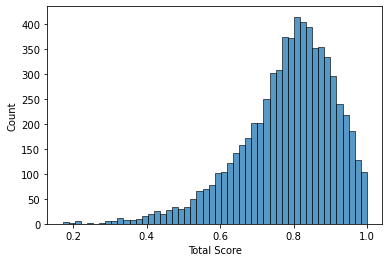

In [33]:
sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])

In [34]:
all_fc_scores = pd.DataFrame(index = egad_scores.index)
all_fc_scores

""
10009at3193
10051at3193
10092at3193
10147at3193
1018at3193
...
9842at3193
9877at3193
9919at3193
9942at3193


In [35]:
list_of_species_to_run_on = species_with_nets_to_run['Common Name'].to_list()


In [36]:
plant_combinations = list(itertools.permutations(list_of_species_to_run_on,2))

In [37]:
for species in list_of_species_to_run_on:
    print(species)
    combos_that_start_with_species = []


    for combo in plant_combinations:
        if combo[0] == species:
            combos_that_start_with_species.append(combo)



    species_specific_df = pd.DataFrame(index = egad_scores.index)
    outer_loop_species_taxa = Name_resolver.species_name_resolver(species,'taxa_id' )
    current_og_groups = og_groups.loc[og_groups['Species']==outer_loop_species_taxa]
    current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]
   
    



    for current_combination in combos_that_start_with_species:
        current_table =get_fc_table(current_combination[0],current_combination[1])
        current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == current_combination[0]]['Taxa ID'].item()
        merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]] )
        mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
        species_specific_df = species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')
        species_specific_df = species_specific_df.rename(columns={'Total Score':current_combination[1]})

    mean_across_species = species_specific_df.mean(axis = 1)
    all_fc_scores[species] = mean_across_species



rice_jp
apple
sorghum
maize
grape
mustard
soybean
medicago
tobacco
potato
tomato
arabidopsis
peanut
cucumber
brome


In [38]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.602391,NaN,0.635981,0.476311,0.566935,0.515122,0.557878,0.584060,0.633060,NaN,NaN
10051at3193,0.681775,NaN,0.614371,0.576558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,0.783370,0.635207,0.805819,0.841827,0.851494,0.702748,0.822412,0.780372,0.829440,0.797876,0.850557,0.789432,0.809780,0.778494,0.805058
10147at3193,0.843007,0.854666,0.894450,NaN,0.839483,0.905545,0.876293,0.871565,0.889439,0.903582,0.880065,0.786749,0.866370,0.894824,0.898700
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,0.873297,0.884347,0.898559,NaN,0.890571,0.868611,0.899667,0.883150,0.870148,0.854566,0.842350,0.878853,0.877166,0.851742,0.884567
9919at3193,0.973417,0.969235,0.982164,0.983412,0.972806,0.985135,0.978850,0.984651,0.981008,0.976979,0.981237,0.972704,0.978750,0.979013,0.969112
9942at3193,0.788257,0.744464,0.807753,0.811668,0.776771,0.856961,0.831713,0.865782,0.816318,0.854899,0.754348,0.870898,0.841105,0.863090,0.793066


In [39]:
egad_scores = egad_scores.replace(.5,np.nan)
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,NaN,NaN,0.79142,0.082094,0.75488,0.002001,...,NaN,NaN,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [40]:
egad_scores = egad_scores.filter(regex = 'AUC')

In [41]:
15-egad_scores.isna().sum(axis = 1)

10009at3193    4
10051at3193    1
10092at3193    2
10147at3193    5
1018at3193     0
              ..
9842at3193     0
9877at3193     7
9919at3193     2
9942at3193     9
9959at3193     2
Length: 15495, dtype: int64

In [42]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.602391,NaN,0.635981,0.476311,0.566935,0.515122,0.557878,0.584060,0.633060,NaN,NaN
10051at3193,0.681775,NaN,0.614371,0.576558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,0.783370,0.635207,0.805819,0.841827,0.851494,0.702748,0.822412,0.780372,0.829440,0.797876,0.850557,0.789432,0.809780,0.778494,0.805058
10147at3193,0.843007,0.854666,0.894450,NaN,0.839483,0.905545,0.876293,0.871565,0.889439,0.903582,0.880065,0.786749,0.866370,0.894824,0.898700
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,0.873297,0.884347,0.898559,NaN,0.890571,0.868611,0.899667,0.883150,0.870148,0.854566,0.842350,0.878853,0.877166,0.851742,0.884567
9919at3193,0.973417,0.969235,0.982164,0.983412,0.972806,0.985135,0.978850,0.984651,0.981008,0.976979,0.981237,0.972704,0.978750,0.979013,0.969112
9942at3193,0.788257,0.744464,0.807753,0.811668,0.776771,0.856961,0.831713,0.865782,0.816318,0.854899,0.754348,0.870898,0.841105,0.863090,0.793066


In [43]:
final_plotting_frame = pd.DataFrame(index = egad_scores.index)
final_plotting_frame['EGAD Species Present'] = 15-egad_scores.isna().sum(axis = 1)
final_plotting_frame['FC Species Present'] = 15 - all_fc_scores.isna().sum(axis =1)
final_plotting_frame['AVG FC'] = all_fc_scores.mean(axis =1)
final_plotting_frame['AVG EGAD'] = egad_scores.mean(axis = 1)
final_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10051at3193,1,3,0.624235,0.824484
10092at3193,2,15,0.792259,0.910269
10147at3193,5,14,0.871767,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.875542,0.852708
9919at3193,2,15,0.977898,0.913266
9942at3193,9,15,0.818473,0.543235


In [44]:
trimmed_plotting_frame = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>2) & (final_plotting_frame['FC Species Present']>2)]
trimmed_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10147at3193,5,14,0.871767,0.709248
10228at3193,3,14,0.927885,0.601839
10525at3193,4,14,0.720309,0.637056
10648at3193,7,15,0.941638,0.534928
...,...,...,...,...
9609at3193,6,13,0.655799,0.838965
9789at3193,12,15,0.836116,0.764906
9828at3193,4,14,0.831148,0.913483
9877at3193,7,14,0.875542,0.852708


(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

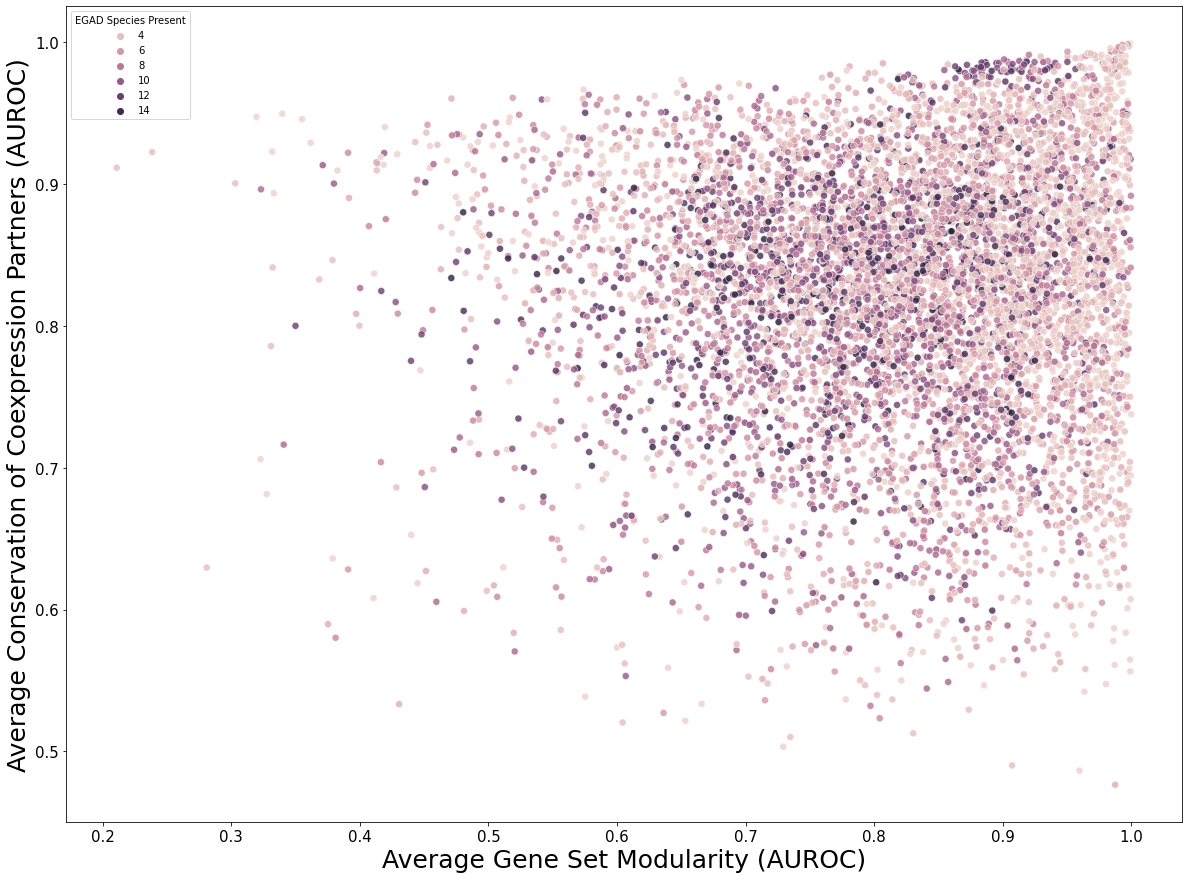

In [76]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'dimgray', alpha = .8, hue = 'EGAD Species Present')

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

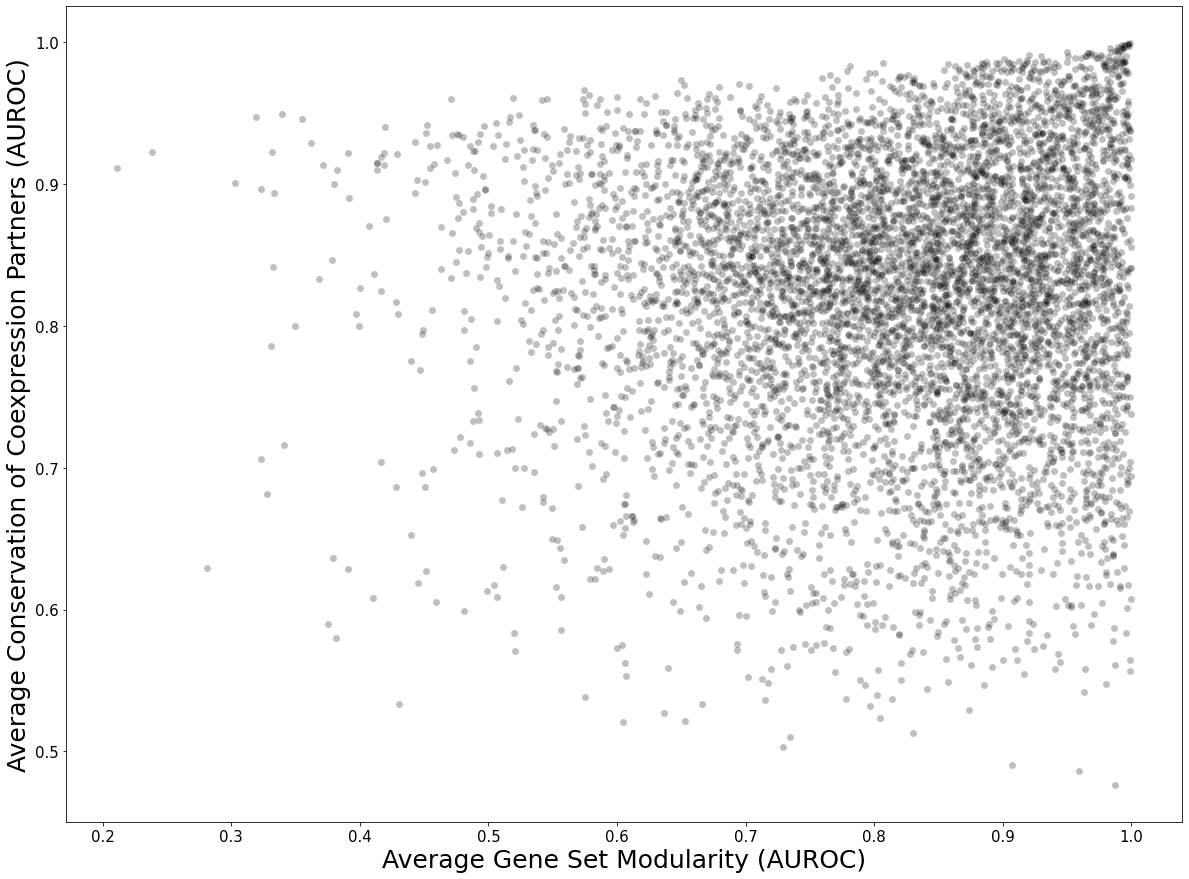

In [46]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25, )

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

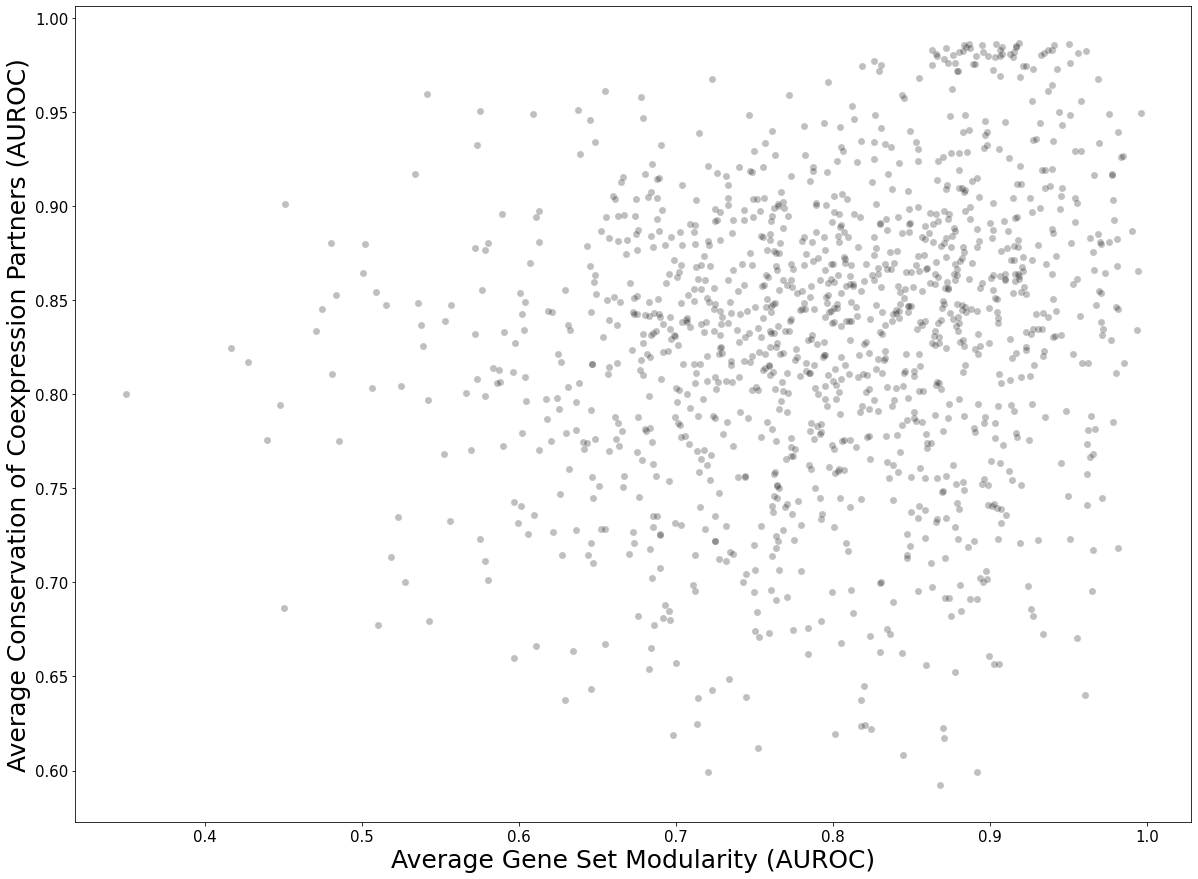

In [51]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [54]:
final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10772at3193,13,15,0.903499,0.808797
10950at3193,15,15,0.847786,0.842641
109843at3193,11,15,0.972793,0.927875
110087at3193,11,14,0.775750,0.810739
110263at3193,13,15,0.836938,0.631345
...,...,...,...,...
923at3193,14,15,0.841320,0.815407
9450at3193,11,15,0.825581,0.893543
9592at3193,14,15,0.817459,0.735142
9601at3193,14,15,0.884984,0.674710


In [63]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/gene_based_over_10_species.csv',index_col= 0)

In [67]:
limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_all_species.csv',index_col= 0)

In [68]:
final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10051at3193,1,3,0.624235,0.824484
10092at3193,2,15,0.792259,0.910269
10147at3193,5,14,0.871767,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.875542,0.852708
9919at3193,2,15,0.977898,0.913266
9942at3193,9,15,0.818473,0.543235


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

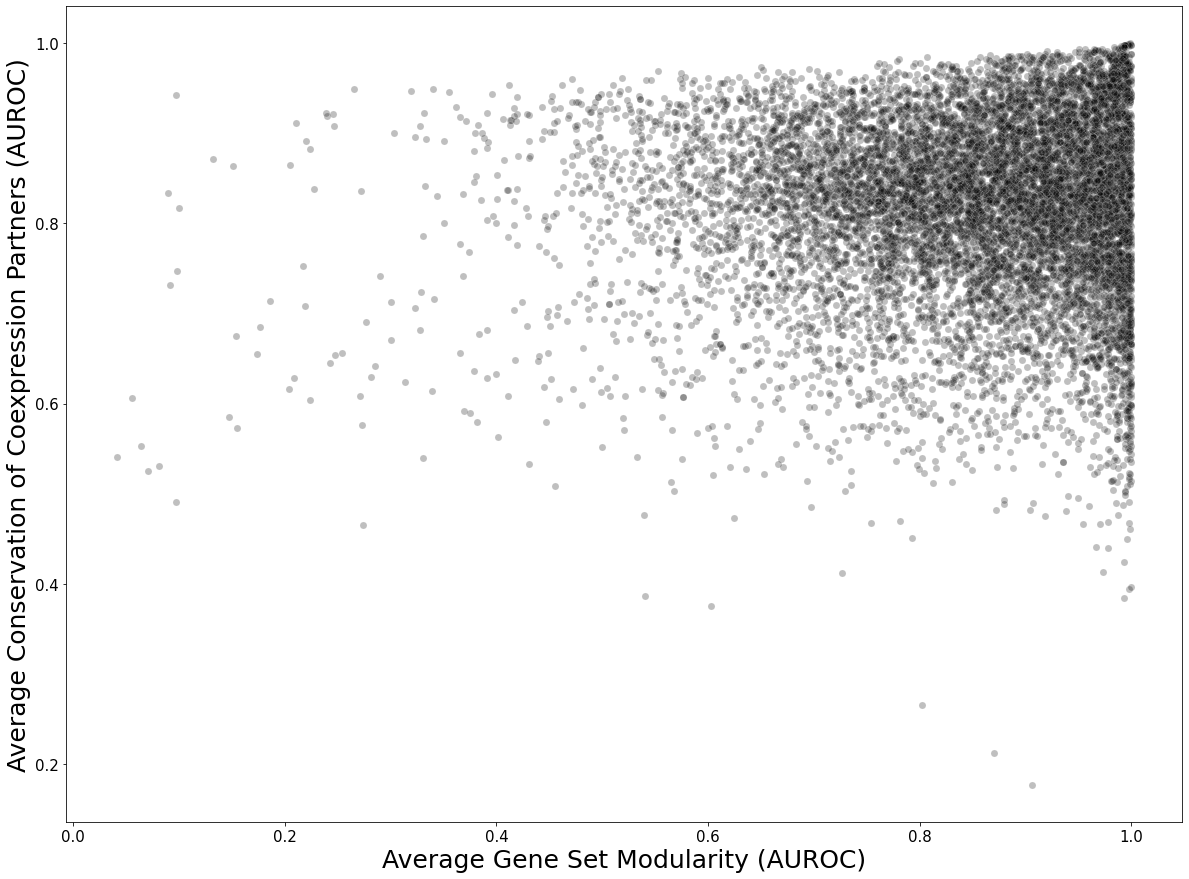

In [69]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [70]:
modded_plotting_frame = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)].copy()

In [71]:
modded_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,8,0.571467,0.829159
10051at3193,1,3,0.624235,0.824484
10092at3193,2,15,0.792259,0.910269
10147at3193,5,14,0.871767,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,14,0.875542,0.852708
9919at3193,2,15,0.977898,0.913266
9942at3193,9,15,0.818473,0.543235


In [72]:
modded_plotting_frame = modded_plotting_frame.rename(columns = {'AVG FC':'ORTHO FC',})

In [73]:
doubled_data = limited_set.merge(right = modded_plotting_frame[['ORTHO FC']], left_index=True, right_index= True)
doubled_data

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,ORTHO FC
10009at3193,4,7,0.559915,0.829159,0.571467
10051at3193,1,1,0.566855,0.824484,0.624235
10092at3193,2,11,0.775712,0.910269,0.792259
10147at3193,5,11,0.852115,0.709248,0.871767
1018at3193,0,0,NaN,NaN,NaN
...,...,...,...,...,...
9842at3193,0,0,NaN,NaN,NaN
9877at3193,7,11,0.824784,0.852708,0.875542
9919at3193,2,11,0.960557,0.913266,0.977898
9942at3193,9,11,0.782169,0.543235,0.818473


In [74]:
doubled_data['Improvement from ORTHO'] = doubled_data['ORTHO FC'] - doubled_data['AVG FC']
doubled_data

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,ORTHO FC,Improvement from ORTHO
10009at3193,4,7,0.559915,0.829159,0.571467,0.011552
10051at3193,1,1,0.566855,0.824484,0.624235,0.057379
10092at3193,2,11,0.775712,0.910269,0.792259,0.016547
10147at3193,5,11,0.852115,0.709248,0.871767,0.019652
1018at3193,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9842at3193,0,0,NaN,NaN,NaN,NaN
9877at3193,7,11,0.824784,0.852708,0.875542,0.050758
9919at3193,2,11,0.960557,0.913266,0.977898,0.017341
9942at3193,9,11,0.782169,0.543235,0.818473,0.036304


In [75]:
doubled_data.mean()

EGAD Species Present      3.473379
FC Species Present        7.660665
AVG FC                    0.783148
AVG EGAD                  0.842155
ORTHO FC                  0.810545
Improvement from ORTHO    0.028214
dtype: float64

In [62]:
doubled_data.mean()

EGAD Species Present      12.730132
FC Species Present        11.571192
AVG FC                     0.735789
AVG EGAD                   0.790506
ORTHO FC                   0.831178
Improvement from ORTHO     0.095388
dtype: float64

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

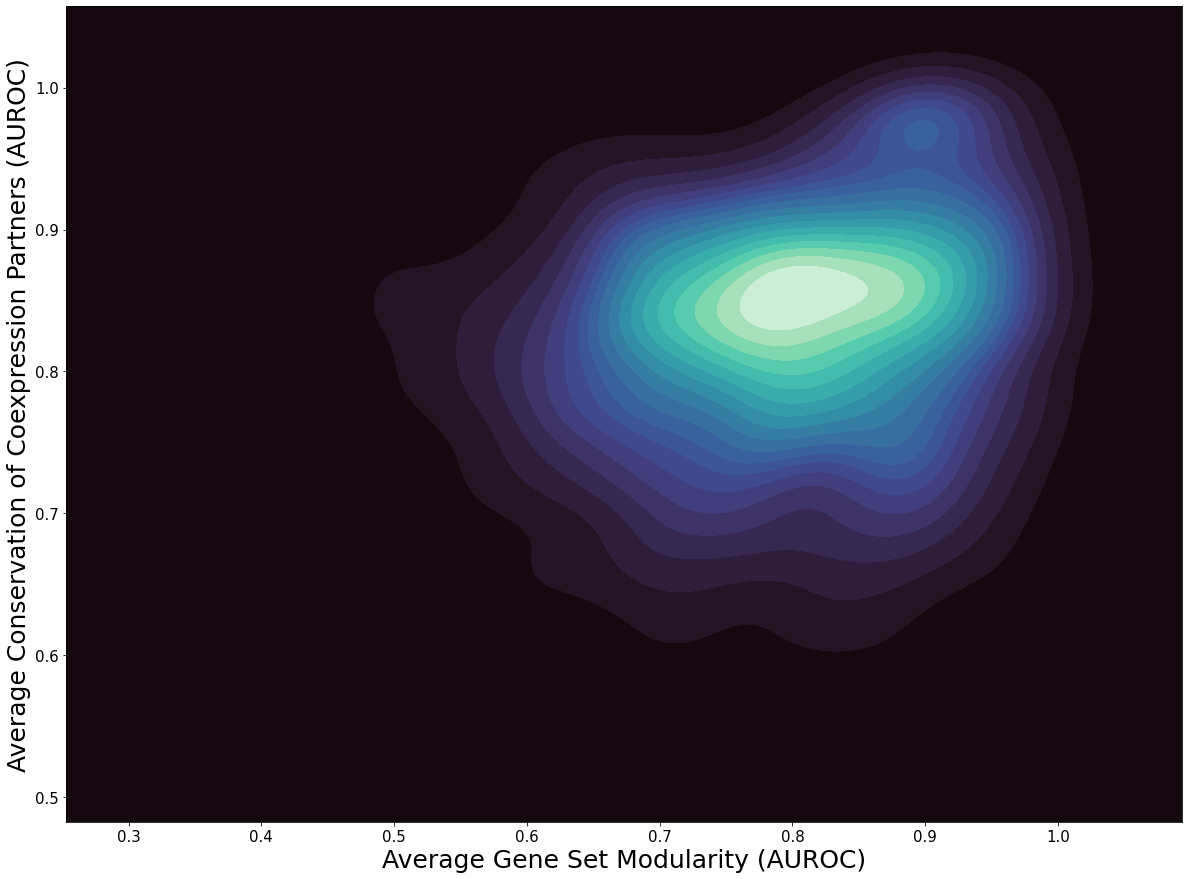

In [48]:
fig, ax = plt.subplots(figsize = (20,15))
sns.kdeplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>9) & (final_plotting_frame['FC Species Present']>9)],y = 'AVG FC',x = 'AVG EGAD',fill=True, thresh=0, levels=20, cmap="mako")

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [49]:
current_table

,cucumber and brome,Species 1 Score,Species 2 Score,Total Score
0,889388at3193,0.950222,0.919619,0.934920
1,36269at3193,0.735552,0.744453,0.740002
2,33678at3193,0.609290,0.805392,0.707341
3,58131at3193,0.807129,0.770927,0.789028
4,874774at3193,0.855705,0.649390,0.752547
...,...,...,...,...
8234,129830at3193,0.966665,0.974388,0.970526
8235,889843at3193,0.984990,0.988427,0.986708
8236,621268at3193,0.758965,0.744939,0.751952
8237,885679at3193,0.628842,0.560095,0.594468


In [ ]:
current_combination

In [ ]:
current_combination[0]

In [ ]:
cur

In [ ]:
current_table.loc[current_table['sorghum'].isin(current_og_groups['Symbol'].to_list())]

In [ ]:
current_og_groups

In [ ]:
current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )

In [ ]:
merged_groups.head(50)

In [ ]:
current_species_taxa

In [ ]:
species_with_nets

In [ ]:
current_table

In [ ]:
all_fc_scores.sum().head(50)

In [ ]:
mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
mean_fc


In [ ]:
    species_specific_df = pd.DataFrame(index = egad_scores.index)


In [ ]:
species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')


In [ ]:
species_specific_df

In [ ]:
all_group_annotations = pd.DataFrame(columns = ['Avg FC','Avg EGAD', 'Species Present'], index = og_groups['Orthogroup'].unique())

In [ ]:
all_group_annotations

In [ ]:
# for group in tqdm.tqdm(all_group_annotations.index):
#     genes = og_groups.loc[og_groups['Orthogroup'] == group]
#     num_species = len(genes['Species'].unique())
#     all_group_annotations.loc[group,'Species Present'] = num_species
all_group_annotations= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
all_group_annotations

In [ ]:
all_group_annotations.to_csv('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_number_species.csv')

In [ ]:
file_genes = open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','wb')
pickle.dump(all_group_annotations,file_genes)
file_genes.close()

In [ ]:
all_orthogroups= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
over_3_groups_annotated = all_group_annotations.loc[all_group_annotations['Species Present']>3]
over_3_groups_annotated

In [ ]:
list_of_species = species_with_nets_to_run['Species'].to_list()
list_of_species

In [ ]:
egad_dataframe = pd.DataFrame(columns = list_of_species, index = over_3_groups_annotated.index,)
egad_dataframe

In [ ]:
for species in tqdm.tqdm(list_of_species):
    current_coconet = CococoNet_reader.read_cococonet(species)
    


In [ ]:
over_3_groups_annotated.

In [ ]:
all_group_annotations

In [ ]:
all_group_annotations

In [ ]:
num_species = len(genes['Species'].unique())
num_species

In [ ]:
genes